In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import requests
import time
import gmaps
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


In [2]:
# Census data files
census_state_path_2017 = "Output/2017_cleaned_all_county.csv"


In [3]:
# Read the Census data
census_state_results = pd.read_csv(census_state_path_2017)


In [4]:
census_state_results.head()

,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,0,Alabama,Autauga County,55036,26899,28137,1485,41497,10401,165,...,313,602,25,17866,4870,1350,24,7539,11062,2861
1,1,Alabama,Baldwin County,203360,99527,103833,8947,168992,19319,1626,...,984,5013,27,72248,11548,5640,89,23996,32740,11184
2,2,Alabama,Barbour County,26201,13976,12225,1100,11973,12524,52,...,150,115,23,6578,1695,577,26,7126,11764,3248
3,3,Alabama,Bibb County,22580,12251,10329,541,16844,4967,90,...,138,122,30,6209,1421,514,24,3432,6006,1851
4,4,Alabama,Blount County,57667,28490,29177,5190,50400,865,173,...,85,448,35,17937,2544,855,21,8996,14647,2825


In [5]:
#Data Collection for Census data summary
total_pop = census_state_results["TotalPop"].sum()
men = census_state_results["Men"].sum()/total_pop * 100
women= census_state_results["Women"].sum()/total_pop * 100
employed_num = census_state_results["Employed"].sum()
employed = census_state_results["Employed"].sum()/total_pop * 100
income_avg = census_state_results["Income"].mean()
professional = census_state_results["Professional"].sum()/employed_num * 100
service = census_state_results["Service"].sum()/employed_num * 100
office = census_state_results["Office"].sum()/employed_num * 100
construction = census_state_results["Construction"].sum()/employed_num * 100
production = census_state_results["Production"].sum()/employed_num * 100
drive = census_state_results["Drive"].sum()/employed_num * 100
carpool = census_state_results["Carpool"].sum()/employed_num * 100
transit = census_state_results["Transit"].sum()/employed_num * 100
walk = census_state_results["Walk"].sum()/employed_num * 100
workathome = census_state_results["WorkatHome"].sum()/employed_num * 100
privatework = census_state_results["PrivateWork"].sum()/employed_num * 100
publicwork = census_state_results["PublicWork"].sum()/employed_num * 100
selfemployed = census_state_results["SelfEmployed"].sum()/employed_num * 100
familywork = census_state_results["FamilyWork"].sum()/employed_num * 100
poverty = census_state_results["Poverty"].sum()/employed_num * 100
childpoverty = census_state_results["ChildPoverty"].sum()/total_pop * 100
unemployment = census_state_results["Unemployment"].sum()/total_pop * 100

In [6]:
summary_2015_df = pd.DataFrame({"Total Pop": [total_pop],
                           "Men%": [men],
                           "Women%": [women],
                           "Income_Avg": [income_avg],
                           "Employed%": [employed],
                           "Professional%": [professional],
                           "Service%": [service],
                           "Office%": [office],
                           "Construction%": [construction],
                           "Production%": [production],
                           "Drive%": [drive],
                           "Carpool%": [carpool],
                           "Transit%": [transit],
                           "Walk%": [walk],
                           "WorkatHome%": [workathome],
                           "Privatework%": [privatework],
                           "Publicwork%": [publicwork],
                           "Selfemployed%": [selfemployed],
                           "Familywork%": [familywork],
                           "Poverty%": [poverty],
                           "Childpoverty%": [childpoverty],
                           "Selfemployed%": [selfemployed],
                           "Unemployment%": [unemployment]})           
                          
             
summary_2015_df .style.format({"Total Pop":"{:,}",
                         "Men%":"{:,.2f}%",
                         "Women%":"{:,.2f}%",
                         "Income_Avg":"${:,.2f}",
                         "Employed%":"{:,.2f}%",
                         "Professional%":"{:,.2f}%",
                         "Service%":"{:,.2f}%",
                         "Office%":"{:,.2f}%",
                         "Construction%":"{:,.2f}%",
                         "Production%":"{:,.2f}%",
                         "Drive%":"{:,.2f}%",
                         "Carpool%":"{:,.2f}%",
                         "Transit%":"{:,.2f}%",
                          "Walk%":"{:,.2f}%",
                          "WorkatHome%":"{:,.2f}%",
                          "Privatework%":"{:,.2f}%",
                          "Publicwork%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Familywork%":"{:,.2f}%",
                          "Poverty%":"{:,.2f}%",
                          "Childpoverty%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Unemployment%":"{:,.2f}%"})  

,Total Pop,Men%,Women%,Income_Avg,Employed%,Professional%,Service%,Office%,Construction%,Production%,Drive%,Carpool%,Transit%,Walk%,WorkatHome%,Privatework%,Publicwork%,Selfemployed%,Familywork%,Poverty%,Childpoverty%,Unemployment%
0,"324,473,370",49.21%,50.79%,"$48,994.97",46.73%,37.41%,17.99%,23.56%,8.88%,12.16%,76.46%,9.15%,5.13%,2.73%,4.71%,79.95%,13.90%,5.98%,0.16%,31.95%,20.61%,6.76%


In [7]:
# list(census_county_results_2015)

In [8]:
# Building a dataframe to find the types that makes up the states workforce based on 2015:
sectors = census_state_results[['State', 'Income','TotalPop', 'Professional', 'Service', 'Office', 'Construction', 'Production']]
sectors

,State,Income,TotalPop,Professional,Service,Office,Construction,Production
0,Alabama,55317,55036,8511,4340,5593,1953,3713
1,Alabama,52562,203360,31961,16293,22918,8684,9668
2,Alabama,33368,26201,2219,1491,2006,1020,2139
3,Alabama,43404,22580,1993,1438,1609,1299,1830
4,Alabama,47412,57667,6093,2758,4981,3378,4169
...,...,...,...,...,...,...,...,...
3215,Puerto Rico,18900,54754,4070,2875,3686,1579,2021
3216,Puerto Rico,16261,8931,611,1123,480,494,213
3217,Puerto Rico,19893,23659,1546,1457,1560,969,1340
3218,Puerto Rico,15586,35025,2182,2048,1630,748,1260


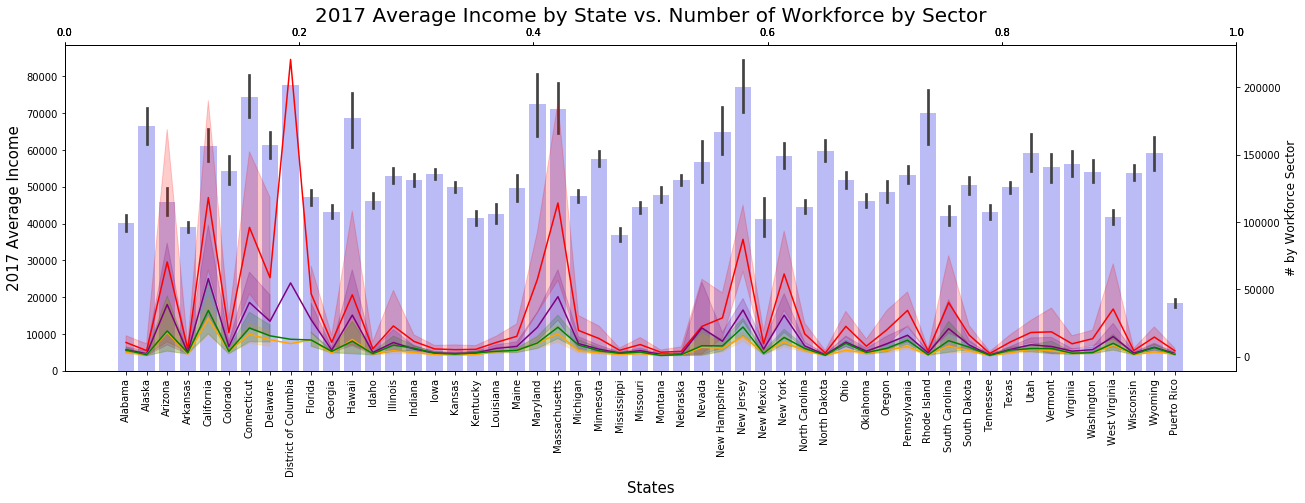

In [9]:
# Combo chart
fig, ax = plt.subplots(figsize=(21,6))
data = sectors

ax.set_title('2017 Average Income by State vs. Number of Workforce by Sector', fontsize=20)
ax = sns.barplot(x='State', y='Income', data = data, color='blue', alpha=.3)

ax2 = ax.twinx()
color1 = 'red'
sns.lineplot(x='State', y='Professional', data = data, ax=ax2, color=color1,alpha=1.0)

ax3 = ax.twiny()
color2 = 'purple'
sns.lineplot(x='State', y='Service', data = data, ax=ax2, color=color2,alpha=1.0)

ax4 = ax.twiny()
color3 = 'orange'
sns.lineplot(x='State', y='Construction', data = data, ax=ax2, color=color3,alpha=1.0)

ax5 = ax.twiny()
color4 = 'green'
sns.lineplot(x='State', y='Production', data = data, ax=ax2, color=color4,alpha=1.0)

ax.set_xlabel('States', fontsize=15)
ax.set_ylabel('2017 Average Income', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig("png_folder/2017 Average Income by State vs. Number of Workforce by Sector.png")
ax2.set_ylabel('# by Workforce Sector', fontsize=12)

plt.show()

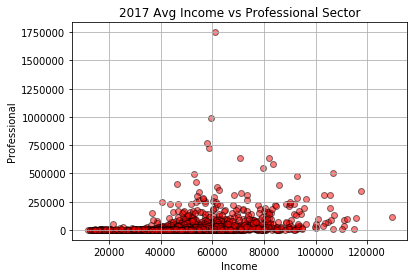

In [10]:
plt.scatter(census_state_results["Income"],census_state_results["Professional"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Professional")
plt.title(f"2017 Avg Income vs Professional Sector")
# plt.savefig("png_folder/2017 Avg Income vs. Professional Sector.png")
plt.grid()
plt.show()

The r-squared is: 0.09251736302665224


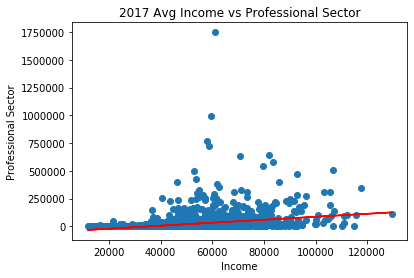

In [11]:
x_value = census_state_results["Income"]
y_value = census_state_results["Professional"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("2017 Avg Income vs Professional Sector")
plt.xlabel("Income")
plt.ylabel("Professional Sector")
# plt.savefig("png_folder/2017 Avg Income vs. Professional Sector Linear Regression.png")
plt.show()